<a href="https://colab.research.google.com/github/priyajain02/Projects/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Descent Method For Linear regression


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('pizzaFranchise.csv')

In [0]:
X=dataset.iloc[:,0]
y=dataset.iloc[:,1]

In [0]:
u = X.mean()
std = X.std()
X = (X-u)/std

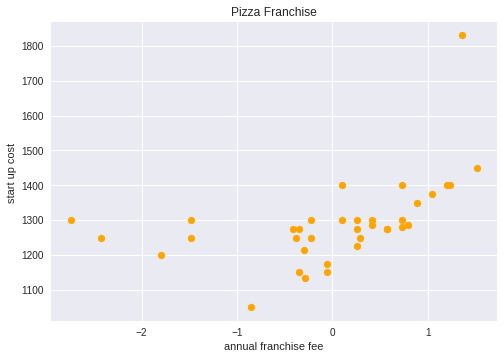

In [0]:
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Pizza Franchise")
plt.xlabel("annual franchise fee")
plt.ylabel("start up cost ")
plt.show()

In [0]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
def gradientDescent(X,Y,max_steps=500,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list


In [0]:
theta,error_list,theta_list = gradientDescent(X,y)

In [0]:
theta

array([1291.05555556,   59.17658382])

In [0]:
error_list

[1681787.3333333333,
 1364460.8646900104,
 1107423.2711111056,
 899220.2497959399,
 730573.7075400745,
 593968.3008793355,
 483316.5299126691,
 393687.46128818614,
 321086.99136829446,
 262279.8573937911,
 214645.46489702654,
 176061.10657831523,
 144807.36851328737,
 119491.50829856747,
 98985.39063071123,
 82375.21453910181,
 68920.79196696833,
 58022.56303273893,
 49194.87807447855,
 42044.35584731472,
 36252.35345261748,
 31560.76680888405,
 27760.528893177365,
 24682.293202607736,
 22188.887265154204,
 20169.199907651513,
 18533.229881099287,
 17208.0751968278,
 16134.684447768772,
 15265.225345250401,
 14560.953206552185,
 13990.484407615893,
 13528.397861641473,
 13154.102201998237,
 12850.918188360083,
 12605.33544587664,
 12406.41041591578,
 12245.278689656607,
 12114.759992995216,
 12009.038219994989,
 11923.402256458106,
 11854.03604414652,
 11797.848530460717,
 11752.335925771964,
 11715.470130306889,
 11685.60835865691,
 11661.419934598276,
 11641.82699405472,
 11625.95645

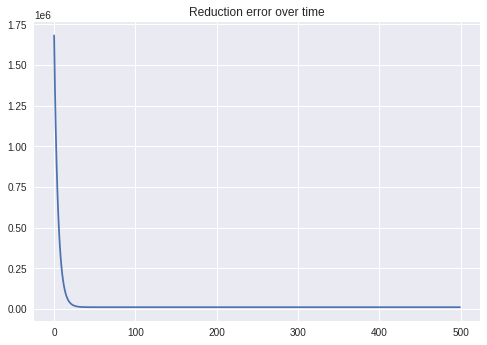

In [0]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [0]:
y_ = hypothesis(X,theta)
print(y_)

0     1240.762158
1     1287.406900
2     1273.226899
3     1266.883214
4     1278.077952
5     1296.735849
6     1334.051642
7     1296.735849
8     1278.077952
9     1371.367436
10    1343.380591
11    1380.696384
12    1306.064797
13    1315.393745
14    1306.064797
15    1352.709539
16    1337.783222
17    1363.904277
18    1362.038487
19    1315.393745
20    1324.722694
21    1274.346372
22    1268.749003
23    1270.614793
24    1270.614793
25    1307.930587
26    1324.722694
27    1306.064797
28    1334.051642
29    1334.051642
30    1147.472674
31    1287.406900
32    1128.814777
33    1203.446365
34    1203.446365
35    1184.788468
Name: X, dtype: float64


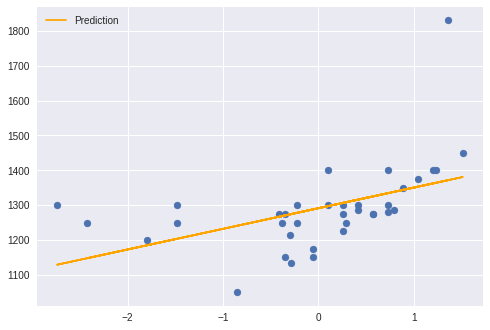

In [0]:
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [0]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [0]:
r2_score(y,y_)

22.753591815551033